# SPAM detection with NLP processing

The project is to build a model able to dectect wether an SMS is an spam or not. To do so we will first treat the SMS with **NLP mehtod**. 

Then we will try to apply an **classification model** on the treated SMS



### package import

In [1]:
import pandas as pd
import spacy
import re
from unidecode import unidecode
import string
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords

#change the working directory if necessary
df_eng=pd.read_csv(r'C:\Users\UTILISATEUR\Desktop\Spam\Spam_dataset.csv',sep=';')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UTILISATEUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **EDA** (Exploratory Data Analysis)

In [2]:
df_eng['Nature'].value_counts()

ham     4825
spam     747
Name: Nature, dtype: int64

Ham is over represented we risk that the model will overfit on the ham. We will ve carefull before trying to build a predictive model

In [3]:
#python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

#### Features extraction

In [ ]:
#Count upper case
df_eng['count_upper']=df_eng.SMS.apply(lambda text: len(re.findall(r'[A-Z]',text))/len(text))

#replace hours
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'\d+(,\d+)?(am|pm)' , 'hour',x))

#Number of words containing letters and numbner
df_eng['non_word']=df_eng.SMS.apply(lambda text: len(re.findall(r'[A-Z]',text)))
#Length message

#punctuation "..."



### Cleaning the sms

In [4]:

print(df_eng.iloc[5370,1])
#Remove upper case
df_eng.SMS=df_eng.SMS.str.lower()
print(df_eng.iloc[5370,1])
#remove accent
df_eng.SMS=df_eng.SMS.apply(lambda text: unidecode(text))


#punctuation "..."

# Replace email address with 'emailaddress'
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress',x))
print(df_eng.iloc[5370,1])
# Replace urls with 'webaddress'
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'^http?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', 'webaddress',x))
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'^https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', 'webaddress',x))
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+(\.[a-zA-Z]+){1,4}', 'webaddress',x))


print(df_eng.iloc[5370,1])
# Replace money symbol with 'money-symbol'
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'^(( )*\£{0,1}( )*)\d*(.\d{1,2})?$', 'moneynumb',x))
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'PS\d+(,\d+)?' , 'moneynumb',x))
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'\d+(,\d+)?p' , 'moneynumb',x))
df_eng.SMS = df_eng.SMS.apply(lambda x: re.sub(r'\d+(,\d+)?ppm' , 'moneynumb',x))




print(df_eng.iloc[5370,1])
#replace numbers
df_eng.SMS=df_eng.SMS.apply(lambda x: re.sub(r'\d{10,15}','phonenumber',x))
df_eng.SMS=df_eng.SMS.apply(lambda x: re.sub(r'\d+','number',x))
print(df_eng.iloc[5370,1])


#retirer la ponctuation
df_eng.SMS=df_eng.SMS.apply(lambda text: text.translate(str.maketrans(string.punctuation ,' '*len(string.punctuation ))
                                                             ).replace(' '*4,' ').replace(' '*3,' ').replace(' '*2,' ').strip())

dating:i have had two of these. Only started after i sent a text to talk sport radio last week. Any connection do you think or coincidence?
dating:i have had two of these. only started after i sent a text to talk sport radio last week. any connection do you think or coincidence?
dating:i have had two of these. only started after i sent a text to talk sport radio last week. any connection do you think or coincidence?
dating:i have had two of these. only started after i sent a text to talk sport radio last week. any connection do you think or coincidence?
dating:i have had two of these. only started after i sent a text to talk sport radio last week. any connection do you think or coincidence?
dating:i have had two of these. only started after i sent a text to talk sport radio last week. any connection do you think or coincidence?


### Lemmatize the sms

In [5]:
#Function to lemmatize the text and take out some ponctuation and the names of peoples
def lemmatize(text):
    lemmatized_array=[]
    doc=nlp(u'{}'.format(text))
    for token in doc:
        if token.lemma_ not in ("'",",","[","]") and (not token.ent_type_ == "PER"):
            lemmatized_array.append(token.lemma_)
    return lemmatized_array

In [6]:
df_nlp_eng=df_eng.copy()

In [7]:
df_nlp_eng.SMS=df_nlp_eng.SMS.apply(lambda x: lemmatize(x))

### Stopwords treatment

In [8]:
stopWords = set(stopwords.words('english'))
stopWords.update(('nt','pl','c'))
def remove_sw(text):
    return[w for w in text if w not in stopWords]

In [9]:
df_nlp_eng.SMS=df_nlp_eng.SMS.apply(lambda text: remove_sw(text))

### Word cloud

In [10]:
df_cloud=df_nlp_eng.copy()

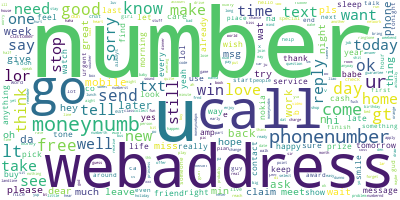

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
df_cloud.SMS=df_cloud.SMS.apply(lambda x: ' '.join(x))
long_string = ','.join(list(df_cloud.SMS.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

##### Word cloud of spams and non spam

In [12]:
df_cloud_ham=df_nlp_eng[df_nlp_eng['Nature']=='ham']
df_cloud_spam=df_nlp_eng[df_nlp_eng['Nature']=='spam']

c:\Users\UTILISATEUR\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


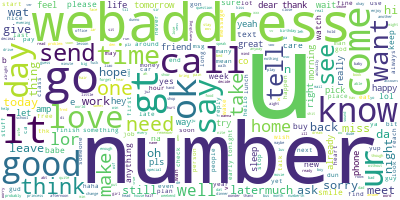

In [13]:
df_cloud_ham.SMS=df_cloud_ham.SMS.apply(lambda x: ' '.join(x))
long_string = ','.join(list(df_cloud_ham.SMS.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

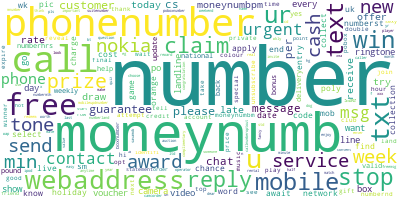

In [14]:
df_cloud_spam.SMS=df_cloud_spam.SMS.apply(lambda x: ' '.join(x))
long_string = ','.join(list(df_cloud_spam.SMS.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue',collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Predictive model

#### Downsampling the data

In [15]:
# check percentage of data - states how much data needs to be balanced
print(str(round(747/4825,2))+'%')

0.15%


In [16]:
#clear empty fields
df_nlp_eng=df_nlp_eng[df_nlp_eng['SMS'].map(len)>0]

#we separe the two type of data
df_ham=df_nlp_eng[df_nlp_eng['Nature']=='ham']
df_spam=df_nlp_eng[df_nlp_eng['Nature']=='spam']


df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

# get the balanced dataset
df_model= pd.concat([df_spam , df_ham_downsampled])

In [17]:
#Change the categorical variable to numerical one
df_model['is_spam']=df_model['Nature'].apply(lambda x: 1 if x=='spam'else 0)

#### Compute the TF-IDF score

In [18]:
#Join the list of word to apply the tf_idf
df_model.SMS=df_model.SMS.apply(lambda x: ' '.join(x))
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df_model.SMS)

In [19]:
#Convert the result to a dataframe and reset the index to the right one
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf_df.set_index(df_model.index,inplace=True)

In [20]:
#Concatenate the score of tf-idf and the initial dataframe
df_model=pd.concat([df_model , tfidf_df],axis=1)

#### Random Forest Classifier Reg

In [21]:
#Separate the training set in differents one
X_model=df_model[df_model.columns.difference(['Nature', 'SMS','is_spam'])]
y=df_model[['is_spam']]
X_train, X_test, y_train, y_test = train_test_split( X_model, y, test_size=0.33, random_state=42)


#Train model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

<ipython-input-21-936c8b35ea25>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [22]:
df_=(df_model.merge(X_test, left_index=True,right_index=True ,how='inner')).merge(pd.DataFrame({'pred':list(y_pred),'index': X_test.index}).set_index('index'),left_index=True,right_on='index')


In [23]:
for i in df_[df_['is_spam']!=df_['pred']].index:
    print(df_.loc[i,'SMS'])

sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect end reply end sptv
want number get lay tonight want real dog location send direct number ur mob join uk large dog network bt txte gravel number ecnumbera webaddress moneynumb
unique enough find numberth august webaddress
sm ac blind date numberu roddsnumber number aberdeen united kingdom check http img sm ac w icmbnumbercktznumberrnumber number blind date send hide
call germany number pence per minute call fix line via access number number number number number prepayment direct access
review keep fantastic nokia n gage game deck club nokia go number webaddress newsletter unsubscribe alert reply word
important customer service announcement premier
reminder download content already pay goto http doit mymoby tv collect content
get touch folk wait company txt back name age opt enjoy community moneynumb sm
would like see xxx pic hot nearly ban uk
sexy single wait text age follow gender wither f webaddress numberf

In [24]:
df_[df_['is_spam']!=df_['pred']]

,Nature,SMS,count_upper_x,is_spam,aa_x,ab_x,aberdeen_x,abiola_x,abj_x,able_x,...,yr_y,yrs_y,yummy_y,yun_y,yup_y,ze_y,zebra_y,zoe_y,zouk_y,pred
index,,,,,,,,,,,,,,,,,,,,,
54,spam,sm ac sptv new jersey devil detroit red wing p...,0.200000,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
135,spam,want number get lay tonight want real dog loca...,0.098765,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
191,spam,unique enough find numberth august webaddress,0.041667,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
305,spam,sm ac blind date numberu roddsnumber number ab...,0.130137,1,0.0,0.0,0.226428,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
333,spam,call germany number pence per minute call fix ...,0.039062,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
709,spam,review keep fantastic nokia n gage game deck c...,0.083871,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
752,spam,important customer service announcement premier,0.123077,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
881,spam,reminder download content already pay goto htt...,0.023622,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
943,spam,get touch folk wait company txt back name age ...,0.098485,1,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Visualisation error

Text(33.0, 0.5, 'Actual')

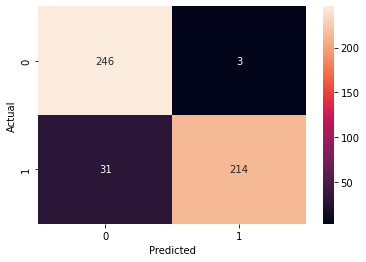

In [25]:
cm = confusion_matrix(y_test,y_pred)
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Model on the whole dataset

In [26]:
df_test=df_nlp_eng.copy()

In [27]:
#Join the list of word to apply the tf_idf
df_test.SMS=df_test.SMS.apply(lambda x: ' '.join(x))
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df_test.SMS)

In [28]:
#Convert the result to a dataframe and reset the index to the right one
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf_df.set_index(df_test.index,inplace=True)

In [29]:
#Concatenate the score of tf-idf and the initial dataframe
df_test=pd.concat([df_test , tfidf_df],axis=1)

Text(33.0, 0.5, 'Actual')

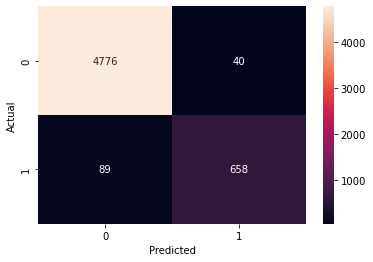

In [30]:
df_test['is_spam']=df_test['Nature'].apply(lambda x: 1 if x=='spam'else 0)


X=df_test[df_test.columns.difference(['Nature', 'SMS','is_spam'])]
X=X[X_model.columns]
y=df_test[['is_spam']]
y_pred=clf.predict(X)
cm = confusion_matrix(y,y_pred)

# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## N-GRAMS

For the N-gram we will use the sentences that are pre-proceced(lemmatize and cleaned of stopword)s

#### Visualization of bi-grams

In [31]:
df_gram=df_nlp_eng.copy()
df_gram['is_spam']=df_gram['Nature'].apply(lambda x: 1 if x=='spam'else 0)

In [32]:
#Fond all the bigram in the texts
def get_grams(data):

    bigrams_final=[]
    bigrams_values=0
    bigrams_labels=0
    for bigram in data.SMS:
        for i in range(0,len(bigram)-1):
            bigram_list_basic=bigram[i]+" "+bigram[i+1]
            bigrams_final.append(bigram_list_basic)

                
    bigrams_final = pd.DataFrame(bigrams_final) 
    bigrams_final.columns=["bigrams"]
    bigrams_values=bigrams_final.groupby("bigrams")["bigrams"].count()
    bigrams_labels=bigrams_final.groupby("bigrams").groups.keys()
    bigrams_final_result = pd.DataFrame(
    {
        "bigram":[*bigrams_labels],
        "count":bigrams_values
    }
    )
    return bigrams_final_result

In [33]:
df_bigram1=get_grams(df_gram[df_gram['is_spam']==1])
df_bigram2=get_grams(df_gram[df_gram['is_spam']==0])

In [34]:
def plot_grams(df_bigram,gram_n,height=4, width=14):
    bigrams_final = df_bigram
    bigrams_final = bigrams_final.sort_values("count",ascending=False).iloc[:15]
    plt.barh(bigrams_final["bigram"],bigrams_final["count"], align="center", alpha=0.7)
    plt.xlabel('Count')
    plt.title('Most common bigrams')
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.show()
    plt.rcParams["figure.figsize"] = fig_size

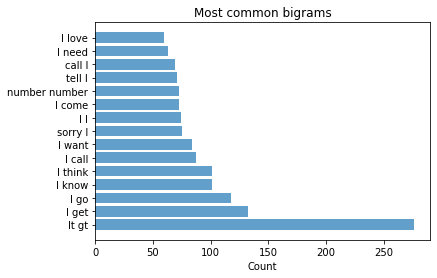

In [35]:
plot_grams(df_bigram2, gram_n=2)

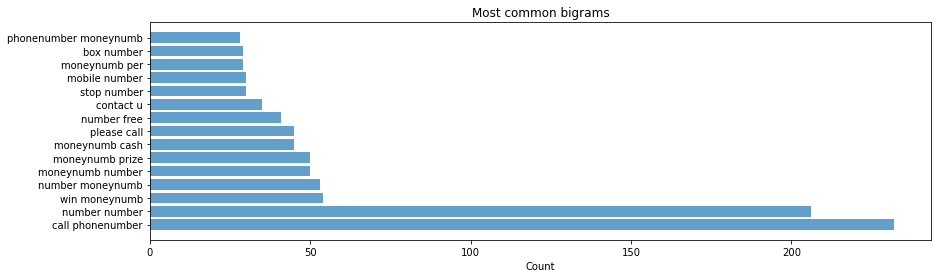

In [36]:
plot_grams(df_bigram1, gram_n=2)

In [37]:
#clear empty fields
df_gram=df_gram[df_gram['SMS'].map(len)>0]

#we separe the two type of data
df_gham=df_gram[df_gram['Nature']=='ham']
df_gspam=df_gram[df_gram['Nature']=='spam']


df_gham_downsampled = df_gham.sample(df_gspam.shape[0])
df_gham_downsampled.shape

# get the balanced dataset
df_model_gram= pd.concat([df_gspam , df_gham_downsampled])

In [38]:
# Getting bigrams 
df_model_gram.SMS=df_model_gram.SMS.apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer(ngram_range =(2, 2))
X1 = vectorizer.fit_transform(df_model_gram.SMS) 
features = (vectorizer.get_feature_names())
print("\n\nX1 : \n", X1.toarray())



X1 : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF

In [39]:

# Applying TFIDF
# You can still get n-grams here
vectorizer = TfidfVectorizer(ngram_range = (2, 2))
X2 = vectorizer.fit_transform(df_model_gram.SMS)
scores = (X2.toarray())
print("\n\nScores : \n", scores)
  
# Getting top ranking features
sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(20))



Scores : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Words : 
                        term       rank
5334          number number  29.676534
871        call phonenumber  27.974811
9308          win moneynumb   9.638116
6271            please call   9.596606
4615        moneynumb prize   9.424657
4124                  lt gt   9.334648
5303       number moneynumb   8.164210
4568         moneynumb cash   8.133641
4603       moneynumb number   7.308669
5203            number free   7.270569
1568       customer service   6.165464
4509          mobile number   5.850626
5515      number webaddress   5.548496
4608          moneynumb per   5.214682
8415            try contact   5.183645
3033         guarantee call   5.168618
6117  phonenumber moneynumb   5.165219
7695            stop number   5.152378
6465        prize guarantee   5.080239
702              box number   5.064922


In [40]:
#Convert the result to a dataframe and reset the index to the right one
tfidf_df_gram = pd.DataFrame(scores, columns=vectorizer.get_feature_names())
tfidf_df_gram.set_index(df_model_gram.index,inplace=True)

In [41]:
#Concatenate the score of tf-idf and the initial dataframe
df_model_gram=pd.concat([df_model_gram,tfidf_df_gram],axis=1)

<ipython-input-42-45a583014fb5>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Text(105.0, 0.5, 'Actual')

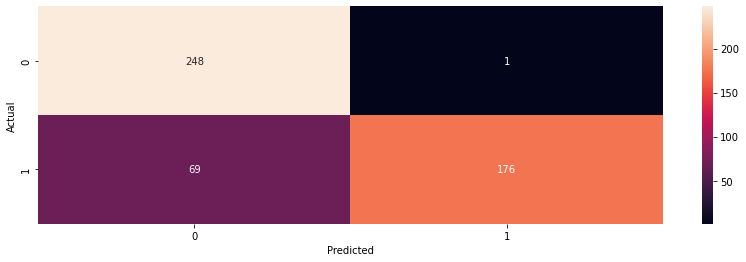

In [42]:
#Separate the training set in differents one
X_model=df_model_gram[df_model_gram.columns.difference(['Nature', 'SMS','is_spam'])]
y=df_model_gram[['is_spam']]
X_train, X_test, y_train, y_test = train_test_split( X_model, y, test_size=0.33, random_state=42)


#Train model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Combination bi-gram and tf-idf

In [43]:
col=['Nature', 'SMS', 'count_upper', 'is_spam','number number', 'call phonenumber', 'please call', 'win moneynumb',
       'moneynumb prize', 'lt gt', 'number moneynumb', 'moneynumb cash',
       'moneynumb number', 'number free', 'customer service',
       'number webaddress', 'mobile number', 'moneynumb per', 'try contact',
       'guarantee call', 'phonenumber moneynumb', 'stop number',
       'prize guarantee', 'box number', 'moneynumb min', 'po box', 'land line',
       'webaddress webaddress', 'code number', 'nokia number',
       'await collection', 'go number', 'call number', 'prize number',
       'urgent mobile', 'valid numberhrs', 'number account', 'number ur',
       'phonenumber land', 'send stop', 'national rate', 'award moneynumb',
       'claim number', 'number claim', 'cash moneynumb', 'account statement',
       'private number', 'claim call', 'free call', 'receive moneynumb',
       'number get', 'number new', 'min number', 'tone number']

In [45]:
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(df_model_gram.SMS)

#Convert the result to a dataframe and reset the index to the right one
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
tfidf_df.set_index(df_model_gram.index,inplace=True)

#Concatenate the score of tf-idf and the initial dataframe
df_model=df_model_gram[col].merge( tfidf_df,left_index=True, right_index=True)

<ipython-input-46-9f9f79e96d14>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Text(105.0, 0.5, 'Actual')

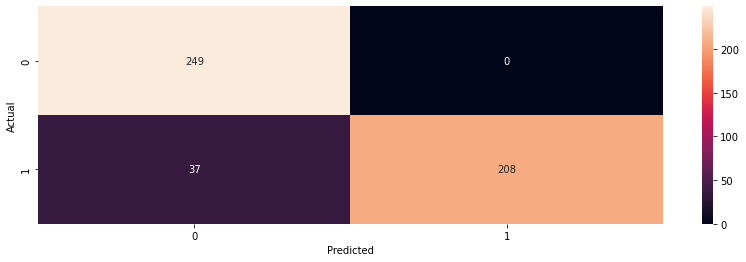

In [46]:
#Separate the training set in differents one
X_model=df_model[df_model.columns.difference(['Nature', 'SMS','is_spam'])]
y=df_model[['is_spam']]
X_train, X_test, y_train, y_test = train_test_split( X_model, y, test_size=0.33, random_state=42)


#Train model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### To develop:
* n-gram
* model to use
* TF-IDF

```

# Replace email address with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

# Replace urls with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Replace money symbol with 'money-symbol'
df['message'] = df['message'].str.replace(r'£|\$', 'money-symbol'
Can help:

```


https://dimensionless.in/spam-detection-with-natural-language-processing-part-2/

https://www.analyticsvidhya.com/blog/2021/09/performing-email-spam-detection-using-bert-in-python/
